# Importing Data:

In [263]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

In [264]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [265]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [266]:
compdata_original.describe(include='all')
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [267]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [268]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations

In [258]:
# Drop the rows with mising T2 values
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.drop(compdata[compdata['T1'] == 0].index, inplace = True) 
compdata.drop(compdata[compdata['T2'] == 0].index, inplace = True) 
compdata.loc[compdata['T1'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [259]:
compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [260]:
# Ratios:

    # ** How to find the ratio for T1 and T2... drop them
    # Should the other numbers be dropped? Make a new df with imputed/calculated numbers?

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [282]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [298]:
#isinstance(compdata['I3'], object) 

#compdata['I3'] = [isinstance(x, str) for x in compdata.I3]
#compdata

#compdata[compdata.I3.apply(lambda x: isinstance(x, str))]

In [140]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [310]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
dtype: float64

In [311]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,27500000.0,289.041,500.0,15288.0,14243.0,360.0,912.0,69.0,122.0,165.0


In [312]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,3840000.0,41.056,339.0,8274.0,7487.0,204.0,421.0,49.0,95.0,70.0


In [313]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,12500000.0,39.675,629.0,15904.0,14741.0,364.0,899.0,104.0,139.0,227.0


In [314]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,3000000.0,81.275,304.0,6904.0,6234.0,147.0,287.0,29.0,61.0,66.0


In [142]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,1.0


In [143]:
# Drop the columns that are missing data in the P variables

compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
dtype: int64

In [144]:
# Create DF with only continuous features

compdata_cont = compdata.drop(['I1','I2','I3','C2','Imputed_C2'], axis=1)
compdata_cont.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
0,10.0,9.5,8.5,11.870000,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,...,0.054250,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1
1,8.0,10.0,8.0,7.250000,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.051395,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0
2,7.0,14.0,12.0,6.700000,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.061764,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0
3,11.5,16.0,14.0,12.390000,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.061630,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1
4,21.0,21.0,19.0,56.599998,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,...,0.048550,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1


In [145]:
# Drop missing P Values from Continues DF

compdata_cont = compdata_cont.dropna(how='all', subset=['P(1Day)'])

In [146]:
compdata_cont.isna().sum()

P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
T3_         0
T4_         0
T5_         0
S1_         0
S2_         0
S3_         0
P(mid)      0
C3_         0
C5_         0
C6_         0
Y1          0
Y2          0
dtype: int64

In [147]:
# Create DF with only categorical features

compdata_cat = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_'], axis=1)
compdata_cat.head()

,I1,I2,I3,C2,C3_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,1,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,0,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,1.0,0,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.0,0,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.0,1,0,1,1.0


__Thoughts:__

- Should we just use the median to fill the continuous values?

__Replace missing values in categorical field with logistic regression predictions__

__Checking the correlations between interval variables__
- heatmap is a good way to visualize the correlation between variables
- **See metadata**
- Do we need to do metadata first?

- Use the Heatmap to determine most correlated variables
    - make scatterplots comparing the 2 variables

# Interquartile Ratio

In [148]:
compdata.shape

(680, 35)

In [149]:
compdata.describe(include='all')

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
count,680,680,672,675.000000,670.000000,670.000000,658.000000,658.000000,658.000000,644.000000,...,679.000000,679.000000,679.000000,670.000000,680.000000,674.000000,680.000000,680.000000,680.000000,680.000000
unique,680,680,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GSAT,Primo Water Corp,2834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.840148,15.476657,13.510612,25.976604,149.849544,0.858663,1.792270,...,0.005490,0.009154,0.011835,14.493634,0.483824,4.641534,5.245685,0.500000,0.677941,0.863235
std,NaN,NaN,NaN,6.061555,6.662624,5.843541,73.342240,153.033149,0.348634,162.919289,...,0.004798,0.004309,0.008982,6.238462,0.500106,6.280361,10.755064,0.500368,0.467609,0.343852
min,NaN,NaN,NaN,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,...,-0.000093,0.002152,0.005125,3.500000,0.000000,0.283223,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.860000,...,0.004142,0.007023,0.009568,11.500000,0.000000,2.853439,0.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,NaN,13.500000,15.000000,13.000000,14.865000,107.000000,1.000000,0.010000,...,0.005050,0.008592,0.011299,14.000000,0.000000,3.766083,0.000000,0.500000,1.000000,1.000000
75%,NaN,NaN,NaN,17.000000,17.000000,15.000000,20.495000,155.750000,1.000000,0.470000,...,0.006255,0.010509,0.012857,16.000000,1.000000,4.906387,7.142857,1.000000,1.000000,1.000000


# Outliers:

In [150]:
# Determine if there are any outliers in the data that will alter the results
# Use box plots for all the variables to visualize the outliers 
# Standardize first!

# only continuous

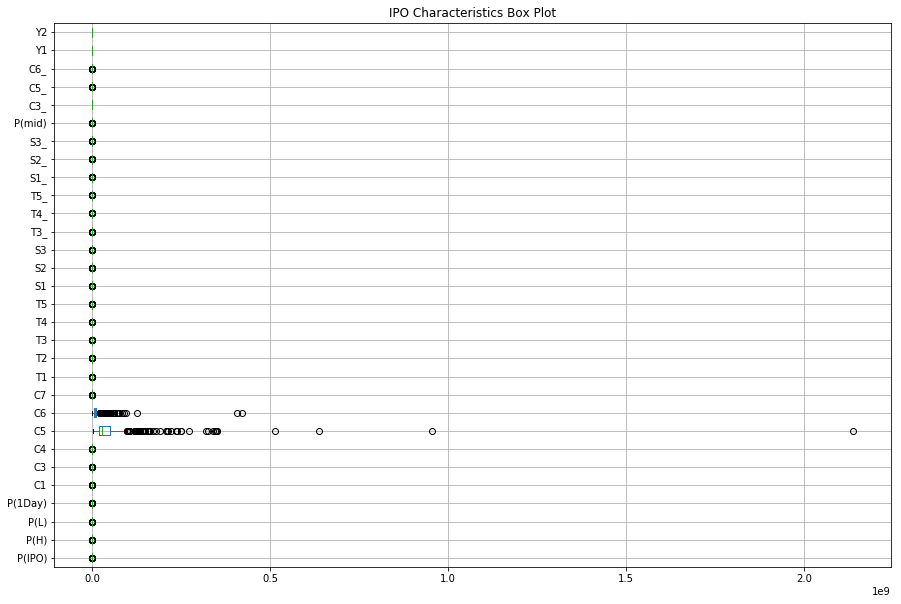

In [179]:
compdata_cont.boxplot(vert=False, figsize=(15,10))
plt.title('IPO Characteristics Box Plot')
plt.show()

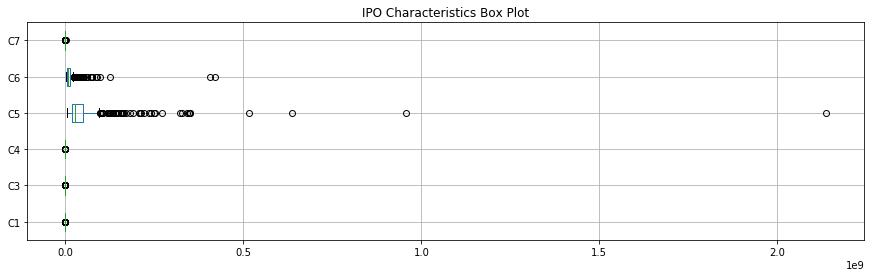

In [197]:
compdata_cont.boxplot(column=['C1','C3','C4','C5','C6','C7'],vert=False, figsize=(15,4))
plt.title('IPO Characteristics Box Plot')
plt.show()

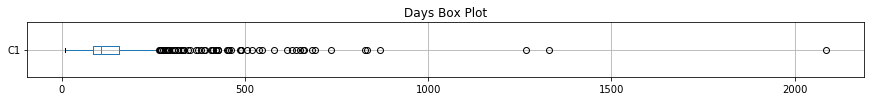

In [183]:
# In number of days

compdata_cont.boxplot(column=['C1'],vert=False, figsize=(15,1))
plt.title('Days Box Plot')
plt.show()

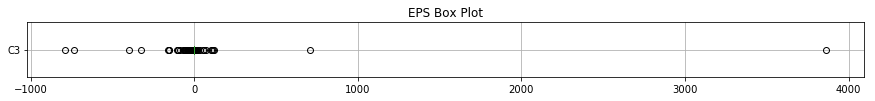

In [184]:
# Seperate the variables into that fit better with one another into their own box plot
    # Help visualization
# EPS is in dollars 

compdata_cont.boxplot(column=['C3'],vert=False, figsize=(15,1))
plt.title('EPS Box Plot')
plt.show()

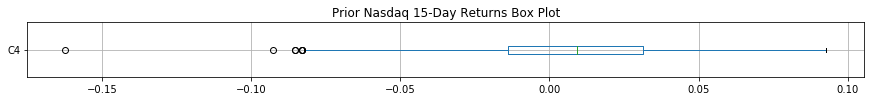

In [185]:
compdata_cont.boxplot(column='C4',vert=False, figsize=(15,1))
plt.title('Prior Nasdaq 15-Day Returns Box Plot')
plt.show()

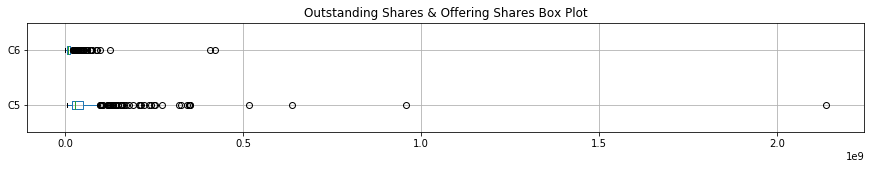

In [186]:
compdata_cont.boxplot(column=['C5','C6'],vert=False, figsize=(15,2))
plt.title('Outstanding Shares & Offering Shares Box Plot')
plt.show()

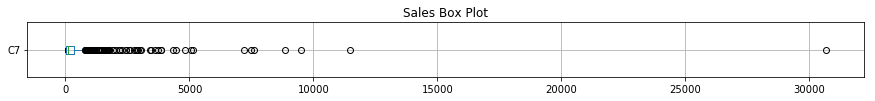

In [187]:
# in millions of dollars

compdata_cont.boxplot(column='C7',vert=False, figsize=(15,1))
plt.title('Sales Box Plot')
plt.show()

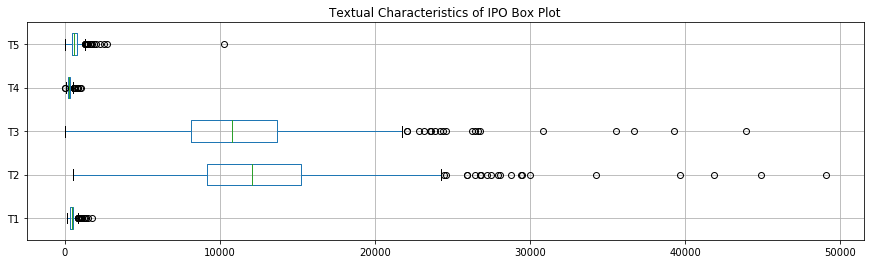

In [188]:
compdata_cont.boxplot(column=['T1','T2','T3','T4','T5'],vert=False, figsize=(15,4))
plt.title('Textual Characteristics of IPO Box Plot')
plt.show()

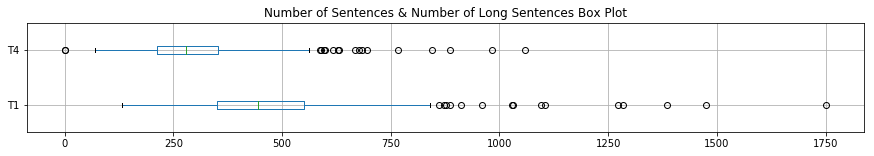

In [189]:
compdata_cont.boxplot(column=['T1','T4'],vert=False, figsize=(15,2))
plt.title('Number of Sentences & Number of Long Sentences Box Plot')
plt.show()

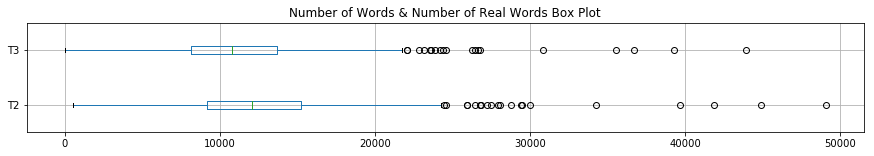

In [190]:
compdata_cont.boxplot(column=['T2','T3'],vert=False, figsize=(15,2))
plt.title('Number of Words & Number of Real Words Box Plot')
plt.show()

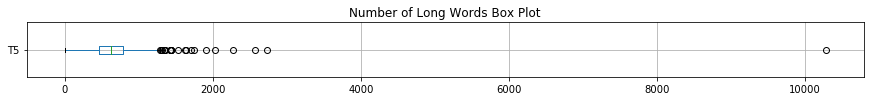

In [191]:
compdata_cont.boxplot(column='T5',vert=False, figsize=(15,1))
plt.title('Number of Long Words Box Plot')
plt.show()

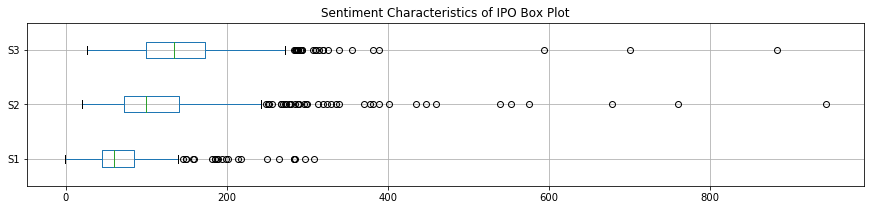

In [192]:
compdata_cont.boxplot(column=['S1','S2','S3'],vert=False, figsize=(15,3))
plt.title('Sentiment Characteristics of IPO Box Plot')
plt.show()

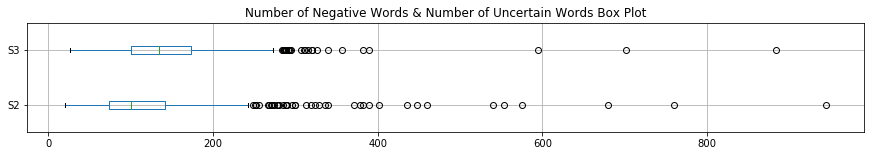

In [193]:
compdata_cont.boxplot(column=['S2','S3'],vert=False, figsize=(15,2))
plt.title('Number of Negative Words & Number of Uncertain Words Box Plot')
plt.show()

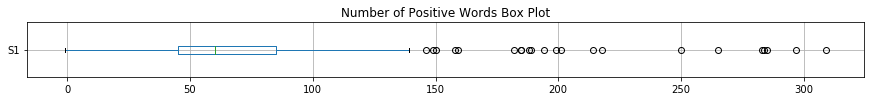

In [198]:
compdata_cont.boxplot(column='S1',vert=False, figsize=(15,1))
plt.title('Number of Positive Words Box Plot')
plt.show()

It is obvious that there are outliers in the dataset that will offset the results. 
To remove this data we will use the interquartile range to determine the upper and lower bound limits and any data outside the limit will be converted to either the lower or upper bound number.

In [ ]:
for col in compdata_cont.columns:
    u_bound = compdata_cont[col].mean() + 3* compdata_cont[col].std()
    compdata_cont[col][compdata_cont[col] > u_bound] = u_bound

In [199]:
# Did not need.. used a for loop instead

# Q1 = compdata['P(IPO)'].quantile(0.25)
# Q3 = compdata['P(IPO)'].quantile(0.75)
# IQR = Q3 - Q1
# LowerBound = Q1 - (1.5 * IQR)
# UpperBound = Q3 + (1.5 * IQR)

# compdata[((compdata['P(IPO)'] < LowerBound) |(compdata['P(IPO)'] > UpperBound))]

# This dataframe has rows for the IQR Upper Bound and Lower Bound numbers for each variable

# iqrdata.loc['IQR'] = (iqrdata.loc['75%']-iqrdata.loc['25%'])
# iqrdata.loc['UpperRange'] = (iqrdata.loc['75%']+(1.5*iqrdata.loc['IQR']))
# iqrdata.loc['LowerRange'] = (iqrdata.loc['25%']-(1.5*iqrdata.loc['IQR']))
# iqrdata

- We need to connect the upper bound and lower bound limits to all the variable results in the original dataframe
- Check to make sure the dataframe shows these changes in variables
- Create a new dataframe of the results excluding the outliers

In [200]:
# Normalization
#... zscore

## Histograms 

In [196]:
compdata['C3'].skew()

20.561940377359615

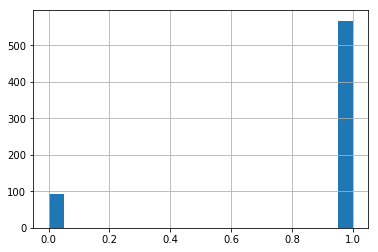

In [39]:
# a lot of missing values here so this is irrelevant right now

compdata['C2'].hist(bins=20)

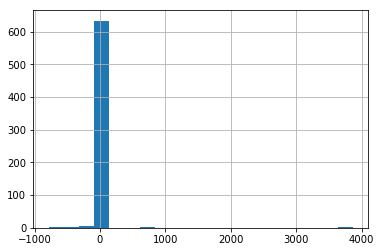

In [40]:
compdata['C3'].hist(bins=20)

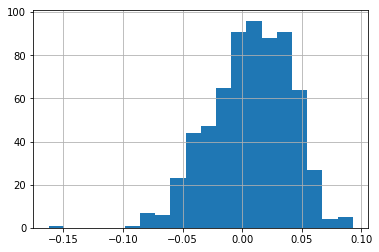

In [41]:
compdata['C4'].hist(bins=20)

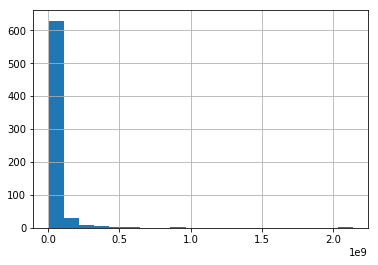

In [42]:
compdata['C5'].hist(bins=20)

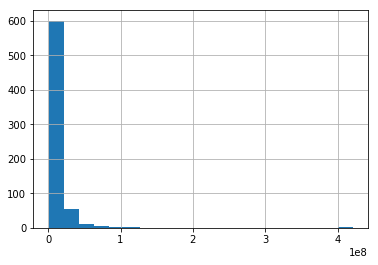

In [43]:
compdata['C6'].hist(bins=20)

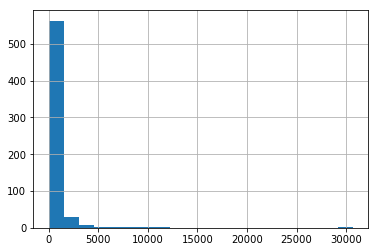

In [44]:
compdata['C7'].hist(bins=20)

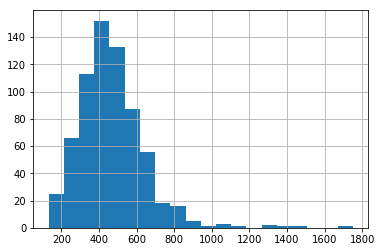

In [45]:
compdata['T1'].hist(bins=20)

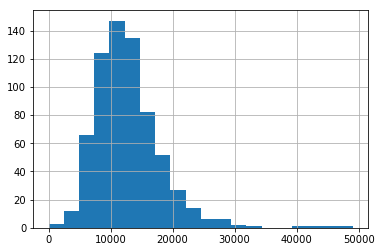

In [46]:
compdata['T2'].hist(bins=20)

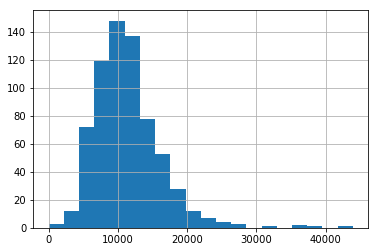

In [47]:
compdata['T3'].hist(bins=20)

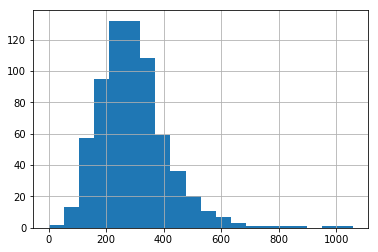

In [48]:
compdata['T4'].hist(bins=20)

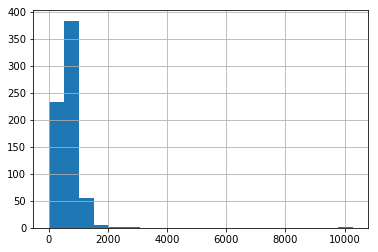

In [49]:
compdata['T5'].hist(bins=20)

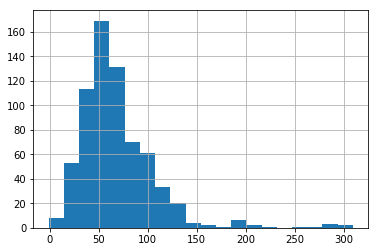

In [50]:
compdata['S1'].hist(bins=20)

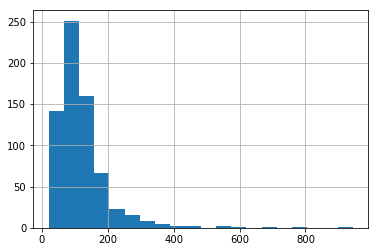

In [51]:
compdata['S2'].hist(bins=20)

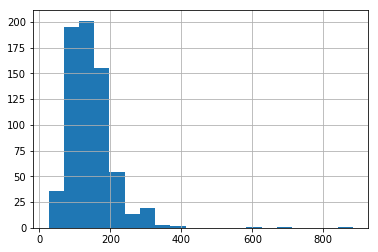

In [52]:
compdata['S3'].hist(bins=20)

In [133]:
# must revisit these histograms.  

In [ ]:
# Correlation between Variables

index= ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3']
df = DataFrame(abs(np.random.randn(18,18)), index=index,  columns=cols)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df, annot=True, cbar=True, cmap='Blues')
plt.title("Correlation between Variables")
plt.show()

# Meta Data:
__Variable Identification__

- Do we need metadata?
- Will this help create the heatmap and correlations?

__**Not Finished__

data = []
for v in compdata.columns:
    # Defining the role
    if v == 'I1':
        role = 'ticker'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
         
    # Defining the level
    if v == ('C2','Y1','Y2','C3'):
        level = 'binary'
    elif v == 'I2':
        role = 'company_name'
    elif v == 'I3':
        role = 'standard_industry_classifier'
    else:
        role = 'input'
    
    # Defining the data type 
    
    # Create a Dict that contains all the metadata for the variable

    
meta = pd.DataFrame(data, columns=[])
meta.set_index('varname', inplace=True)